In [5]:
import numpy as np # linear algebra
import pandas # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import pickle
import operator
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#pre process
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# algos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# model selection
from sklearn import model_selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# analysis
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [6]:
#Load The Dataset
url = "H:\Imarticus\All_Classification\imdb-sentiments\data.csv"
features = ['text','class']

In [65]:
def vectorize(data):
    print("vectorizing data")
    if type(data)==str: data=data.split()
    cdata=set(data)
    vector_map={}; i=0
    for c in cdata:
        vector_map[i]=c; i=i+1
    #print(vector_map)
    return vector_map


def sort_by_value(dictx):
    print("sorting by value")
    dicty=sorted(dictx.items(),key=operator.itemgetter(1),reverse=True)
    return dicty
    

def tex2vec(X):
    print("text2vec")
    xlist=[]
    if type(X)==str: X=[X]; print("txt2vec--->string")
    if type(X)==list: xlist=X; print("txt2vec--->list")
    if type(X)==np.ndarray:
        for i in range(len(X)): xlist.append(X[i][0])
        print("txt2vec--->ndarray"); #print(X[i][0]); return
        
    vectorizer = TfidfVectorizer(min_df=0.001, max_df=1.0)
    trainvectors = vectorizer.fit_transform(xlist)
    return trainvectors

#tv = tex2vec(["i am on the train and travelling to home town", "my home town is traditionally rich"]); print(tv) 

def get_XY(url, vectorize, features):
    print("getXY")
    input = pandas.read_csv(url, names=features, encoding="ISO-8859-1"); #print(dataset)
    classes=sorted(set(input['class']))
    sampledf = pandas.DataFrame()
    subset1 = input[input['class']=='Positive'].sample(n=3000)
    subset2 = input[input['class']=='Negative'].sample(n=3000)
    sampledf = subset1.append(subset2)
    print(sampledf)
    
    dataset = sampledf.reset_index()
    print(dataset)
    
    if vectorize==1:
        h=list(dataset.columns.values)[0]; #print(h)
        dataset[h] = dataset[h].values.astype('U')
    array = dataset.values; #print(array[0])
    n = len(array[0]); #print("len--->", n)
    X = array[:,1:n-1]
    Y = array[:,n-1]
    print("type of X",type(X))
    #print("x-->",X); print("y-->",Y)
    print(X.shape, Y.shape)
    return X, Y

#X, Y = get_XY(url, 0, features); print(X[:5], Y[:5])



def pca_prog(url, features, n):
    print("pca_prog")
    X, Y =  get_XY(url, 0, features)
    X, Y = X[1:], Y[1:]
    pca = PCA(n_components=n)
    fit = pca.fit(X);
    print(fit.explained_variance_ratio_)
#    print(fit.singular_values_)
    xfit = fit.components_; #print(xfit[:5])
    return xfit

#pca_prog(url, features, 4)


def rfe_prog(url, features, n):
    print("rfe_prog")
    X, Y =  get_XY(url, 0, features)
    X, Y = X[1:], Y[1:]
    model = LogisticRegression()
    rfe = RFE(model, n)
    fit = rfe.fit(X,Y)
    xfit = fit.ranking_; print(xfit)
    return xfit

#rfe_prog(url, features, 1)

def ETC_prog(url, features, n):
    print("ETC prog")
    X, Y =  get_XY(url, 0, features)
    X, Y = X[1:], Y[1:]
    model = ExtraTreesClassifier()
    model.fit(X, Y)
    f_imp = model.feature_importances_; print(f_imp)
    print(X[:2])
    return f_imp

#ETC_prog(url, features, 4)

def top_fits(X, n, f_imp):
    print("top fits")
    importance={}
    for i in range(len(f_imp)):
        importance[i]=round(f_imp[i],3)
    importance = sort_by_value(importance); print(importance)
    
    XT = X.transpose(); xNew=[]; c=0
    for k, v in importance:
        xNew.append(XT[k])
        if c>=n: break
        c=c+1
    xNew = np.array(xNew)
    X = xNew.transpose()
    return X

#top_fits(X, n, f_imp)
def summarize(url, features):
    print("summarize")
    dataset = pandas.read_csv(url, names=features)
    newdata = pandas.DataFrame([])
    for col in dataset.columns:
        if col=="class": continue
        newdata[col]=np.log(dataset[col])

    #Summarize the Dataset
    Summary={}
    Summary['Shape']=dataset.shape; print(Summary['Shape'])
    Summary['Describe']=dataset.describe(); print(Summary['Describe'])
    Summary['Groups']=dataset.groupby('class').size().to_json(); print(Summary['Groups'])
      
#    Data Visualization
#    dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False); plt.savefig("box.jpg"); plt.show()
#    dataset.hist(); plt.savefig("hist.jpg"); plt.show()
#    newdata.hist(); plt.show()
#    scatter_matrix(dataset); plt.savefig("scatter.jpg"); plt.show()

#summarize(url, features) 
 
def get_models():
    print("get_models")
    models = {}
    models['LogR'] = LogisticRegression()
    models['LDA'] = LinearDiscriminantAnalysis()
    models['KNN'] = KNeighborsClassifier()
    models['DTC'] = DecisionTreeClassifier(criterion="gini")
    models['NBC'] = GaussianNB()
    models['SVC'] = SVC()
    models['RFC'] = RandomForestClassifier()
    models['MLP'] = MLPClassifier()
    models['GBC'] = GradientBoostingClassifier()
    return models

In [66]:
def compare(url, features, vectorize):
    print("compare")
    X, Y = get_XY(url, vectorize, features) 
    if vectorize==1: X = tex2vec(X); X = X.toarray(); #print(X)
    
    #create validation set
    validation_size = 0.20
    seed = 7
    Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
    
    #Test options and evaluation metric
    scoring = 'accuracy'

    models = get_models()
    # evaluate each model in turn
    results = []
    model_names = []
    model_list = {}
    compare_list = {}
    for name, model in models.items():
        kfold = model_selection.KFold(n_splits=2, random_state=seed)
        cv_results = model_selection.cross_val_score(model, Xt, Yt, cv=kfold, scoring=scoring)
        results.append(cv_results)
        model_names.append(name)
        model_list[model]=cv_results.mean()
        compare_list[name]=[" Mean: "+str(round(cv_results.mean(),2)), "  Std: "+str(round(cv_results.std(),2))]
        print(name, ':', cv_results.mean(), cv_results.std())
    #print(model_names)
    model_dict=sort_by_value(model_list); print(model_dict)
    final_model=model_dict[0][0]; print('final_model: ',final_model)

    #Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(model_names)
    plt.savefig('comparison.jpg'); plt.show()
    print(compare_list)

In [67]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.5, 1.0, 5)):
    print("plot_learning_Curve")
    plt.figure(); #print(title); print(y)
    plt.title(title)
    if ylim is not None: plt.ylim(*ylim); print(1)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    print("final results")
    print("X-->",X); print("y-->",y); print("y type", type(y));print(X.shape,y.shape); print(np.unique(y))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=2)
    print(2)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print(3)
    plt.grid()
    print(4)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    print(5)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    print(6)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    print(7)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    print(8)
    plt.legend(loc="best"); plt.show()
    print("end of learning curve")
	#plt.savefig("learning_curve.jpg"); plt.show()
    return plt

In [68]:
def train(url, features, model_key, vectorize, model_name):
    print("train")
    model_dict=get_models()
    final_model=model_dict[model_key]; print('final_model--->', final_model)
    X, Y = get_XY(url, vectorize, features); print("input-->", X[0]); print("label-->", Y[0])
    if vectorize==1: X = tex2vec(X); X = X.toarray(); print(X.shape)
    
    # selecting importanct features
    #n = 10
    #X = pca_prog(url, features, n)
    #X = ETC_prog(url, features, n)
    
    print("create validation set")
    validation_size = 0.20
    seed = 7
    Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

##    fpr, tpr, th = roc_curve(Yt, Yv)
##    roc_auc = auc(fpr, tpr); print('roc_auc-->', roc_auc)
    
    ## Make predictions on validation dataset
    Yt = Yt.reshape(Yt.size, 1); print("reshaped Yt")
    final_model.fit(Xt, Yt); print("fitting model")
    predictions = final_model.predict(Xv)
    score = accuracy_score(Yv, predictions)
    report = classification_report(Yv, predictions)
    matrix = confusion_matrix(Yv, predictions)
    print('Accuracy: ', score); 
    print(""); print(report); print(""); print(matrix)
    pickle.dump(final_model, open('models/'+model_name+'.pickle','wb')); print("Training Completed")
    
    title = "Learning Curves - "+str(model_key); print(title)
    # Cross validation with 2 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0); print("cross validation complete")
#    Y = Y.reshape(150,1)
    y=Y; print(type(y)); print(y)
    #plot_learning_curve(final_model, title, X, y)
    plt.show()

In [69]:
model_key = "LogR"
vectorize = 1
model_name = model_key
train(url, features, model_key, vectorize, model_name)

train
get_models
final_model---> LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
getXY
                                                    text     class
11193  "Hollywood Hotel" has relationships to many fi...  Positive
7044   This is amazing-looking movie with the whole t...  Positive
12359  Yesterday, I went alone to the cinema, because...  Positive
7620   I saw a trailer for this on Afro Promo, the co...  Positive
6367   This cartoon is short on plot, but is a visual...  Positive
10866  I'm sick of people whining about Ewoks! True, ...  Positive
507    The magnetism radiated from Elvira, drawing he...  Positive
517    I've been watching "Dick Tracy" for years, and...  Positive
6957   I remember when I first saw this short, I was ...  Positive
4306   My comment is limite

(6000, 11114)
create validation set
reshaped Yt


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fitting model
Accuracy:  0.8583333333333333

              precision    recall  f1-score   support

    Negative       0.88      0.83      0.85       604
    Positive       0.83      0.89      0.86       596

   micro avg       0.86      0.86      0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200


[[499 105]
 [ 65 531]]
Training Completed
Learning Curves - LogR
cross validation complete
<class 'numpy.ndarray'>
['Positive' 'Positive' 'Positive' ... 'Negative' 'Negative' 'Negative']


compare
getXY
                                                    text     class
11682  If you liked Roman Polanski's "Repulsion", you...  Positive
5647   I think it's one of the greatest movies which ...  Positive
5677   Being a fan of the first Lion King, I was defi...  Positive
8192   What network was , Diagnosis Murder on? I thou...  Positive
9218   "Fear of a Black Hat" is a superbly crafted fi...  Positive
9957   I rank this the best of the Zorro chapterplays...  Positive
4195   Excellent writing and wild cast. The tech is p...  Positive
2462   This is one creepy movie. Creepier than anythi...  Positive
9600   The Hanson brothers - Andy (apparently has his...  Positive
6991   This movie is basically a documentary of the c...  Positive
10836  Prof. Janos Rukh (Boris Karloff) discovers Rad...  Positive
872    Uneducated & defiant, beautiful TESS OF THE ST...  Positive
7827   Writers Perry and Randy Howze crafted a very e...  Positive
9594   (You'll know what I mean after you've see

get_models


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogR : 0.8425 0.014583333333333337


D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA : 0.721875 0.0077083333333333726
KNN : 0.6785416666666666 0.01395833333333335
DTC : 0.6604166666666667 0.0029166666666666785
NBC : 0.6266666666666667 0.004583333333333328


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC : 0.49291666666666667 0.0008333333333333526


D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC : 0.7133333333333334 0.011250000000000038
MLP : 0.84625 0.0058333333333333015
GBC : 0.7922916666666666 0.013124999999999998
sorting by value
[(MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False), 0.84625), (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 0.8425), (GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance

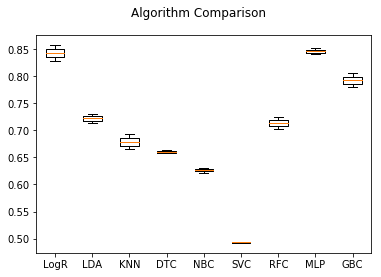

{'LogR': [' Mean: 0.84', '  Std: 0.01'], 'LDA': [' Mean: 0.72', '  Std: 0.01'], 'KNN': [' Mean: 0.68', '  Std: 0.01'], 'DTC': [' Mean: 0.66', '  Std: 0.0'], 'NBC': [' Mean: 0.63', '  Std: 0.0'], 'SVC': [' Mean: 0.49', '  Std: 0.0'], 'RFC': [' Mean: 0.71', '  Std: 0.01'], 'MLP': [' Mean: 0.85', '  Std: 0.01'], 'GBC': [' Mean: 0.79', '  Std: 0.01']}


In [70]:
compare(url, features, 1)